In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df_h=pd.read_csv("/Users/yugo_suzuki/mydevelopment/development/MLDL/data_csv/winequality-white.csv", sep=";", encoding="utf-8")
df_h

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
X=df_h.drop("quality", axis=1)## 目的変数の品質の項目を除外する
y=df_h["quality"]##目的変数を品質に設定する。
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,train_size=0.75, shuffle=True) ##テストと学習のデータの量の比率を１：３にする

In [5]:
print(df_h.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
from sklearn.ensemble import RandomForestClassifier
df_h=RandomForestClassifier() ##ランダムにデータを取得する
df_h.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred= df_h.predict(X_test)
print(classification_report(y_test, y_pred))
print("正解率 = ", accuracy_score(y_train, y_train))
print("正解率 = ", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.26      0.42        38
           5       0.73      0.68      0.71       337
           6       0.63      0.82      0.71       558
           7       0.71      0.47      0.57       238
           8       0.95      0.40      0.56        45
           9       0.00      0.00      0.00         2

    accuracy                           0.68      1225
   macro avg       0.57      0.38      0.42      1225
weighted avg       0.69      0.68      0.66      1225

正解率 =  1.0
正解率 =  0.6759183673469388


/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [8]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0)##cの値をうまく調整することによってやる。
clf.fit(X_train,y_train)
print("正答率(訓練) = ",clf.score(X_train,y_train))
print("正解(テスト)", clf.score(X_test,y_test))

正答率(訓練) =  0.5273618295671113
正解(テスト) 0.5208163265306123


In [9]:
from sklearn import linear_model
clf=linear_model.SGDClassifier(loss='hinge',penalty='l2',alpha=0.001)
clf.fit(X_train,y_train)
print("正答率(訓練) = ",clf.score(X_train,y_train))
print("正解(テスト)", clf.score(X_test,y_test))

正答率(訓練) =  0.3817043288864688
正解(テスト) 0.3640816326530612


In [10]:
from sklearn.neighbors import KNeighborsClassifier ## KNeighborsClassifierの機械学習を行う
clf=KNeighborsClassifier(n_neighbors=200)
clf.fit(X_train,y_train)
print("正答率(訓練) = ",clf.score(X_train,y_train))
print("正解(テスト)", clf.score(X_test,y_test))

正答率(訓練) =  0.47944459569833925
正解(テスト) 0.44979591836734695


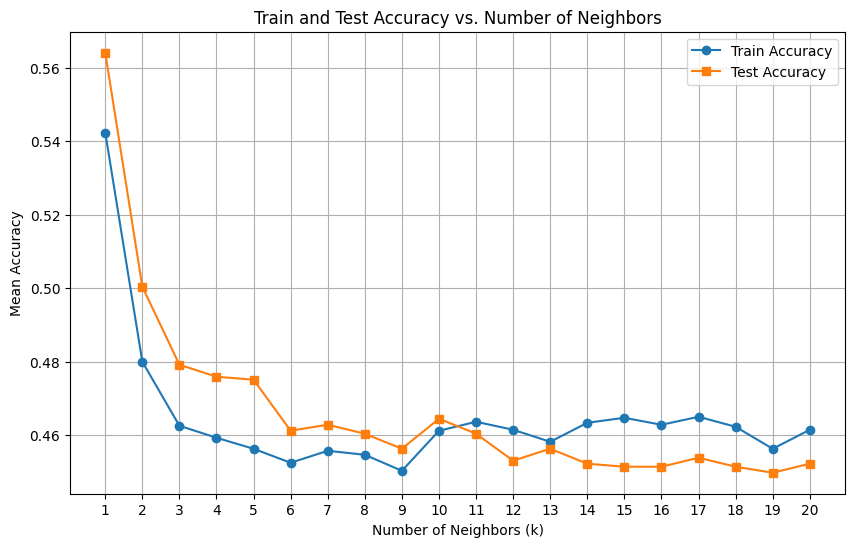

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# kの値を設定
k_values = range(1, 21)
mean_train_accuracies = []
mean_test_accuracies = []

# kごとの正答率を計算
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    # 訓練データの正答率
    train_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5分割の交差検証
    mean_train_accuracies.append(train_scores.mean())
    
    # テストデータでの正答率
    clf.fit(X_train, y_train)  # モデルを訓練
    test_accuracy = clf.score(X_test, y_test)  # テストデータで評価
    mean_test_accuracies.append(test_accuracy)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, mean_test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [ ]:

# Cの値を設定
C_values = [0.01, 0.1, 1, 2, 5, 10, 100]
mean_train_accuracies = []
mean_test_accuracies = []

# Cごとの正答率を計算
for C in C_values:
    clf = SVC(kernel='linear', C=C)
    # 訓練データの正答率
    train_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5分割の交差検証
    mean_train_accuracies.append(train_scores.mean())
    
    # テストデータでの正答率
    clf.fit(X_train, y_train)  # モデルを訓練
    test_accuracy = clf.score(X_test, y_test)  # テストデータで評価
    mean_test_accuracies.append(test_accuracy)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_train_accuracies, marker='o', label='Train Accuracy')
plt.plot(C_values, mean_test_accuracies, marker='s', label='Test Accuracy')
plt.xscale('log')  # Cの値を対数スケールで表示
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Accuracy')
plt.title('Train and Test Accuracy vs. Regularization Parameter (C)')
plt.xticks(C_values)
plt.legend()
plt.grid()
plt.show()

/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [10]:
# 決定木をインポート
from sklearn import tree
rg = tree.DecisionTreeRegressor(max_depth=5)
#予測値を入れる
y_pred = rg.fit(X, y).predict(X)
# 決定係数の表示
print(rg.score(X,y))

0.3666891190470236


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


                 Feature  Importance
10               alcohol    0.244139
1       volatile acidity    0.124681
5    free sulfur dioxide    0.114154
8                     pH    0.071131
6   total sulfur dioxide    0.070681
3         residual sugar    0.069378
4              chlorides    0.063697
9              sulphates    0.062289
0          fixed acidity    0.061654
7                density    0.060001
2            citric acid    0.058194
